## Introduction
We have already covered inheritance, or more specific "single inheritance". As we have seen, a class inherits in this case from one class. Multiple inheritance on the other hand is a feature in which a class can inherit attributes and methods from more than one parent class. The critics point out that multiple inheritance comes along with a high level of complexity and ambiguity in situations such as the diamond problem. We will address this problem later in this chapter.

The widespread prejudice that multiple inheritance is something "dangerous" or "bad" is mostly nourished by programming languages with poorly implemented multiple inheritance mechanisms and above all by improper usage of it. Python has a sophisticated and well-designed approach to multiple inheritance.

A class definition, where a child class SubClassName inherits from the parent classes BaseClass1, BaseClass2, BaseClass3, and so on, looks like this:
```
class SubclassName(BaseClass1, BaseClass2, BaseClass3, ...):
    pass
```
It's clear that all the superclasses BaseClass1, BaseClass2, BaseClass3, ... can inherit from other superclasses as well. What we get is an inheritance tree.

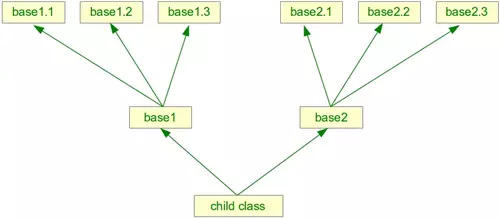

## Example: CalendarClock
We want to introduce the principles of multiple inheritance with an example. For this purpose, we will implement two independent classes: a "Clock" and a "Calendar" class. After this, we will introduce a class "CalendarClock", which is, as the name implies, a combination of "Clock" and "Calendar". CalendarClock inherits both from "Clock" and "Calendar".

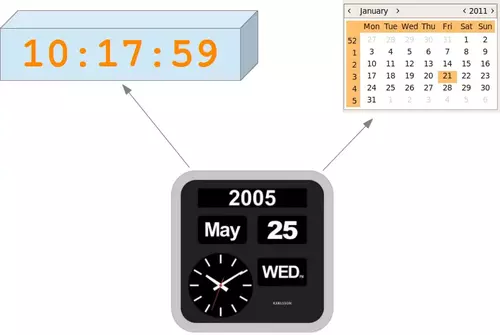

The class ```Clock``` simulates the tick-tack of a clock. An instance of this class contains the time, which is stored in the attributes ```self.hours```, ```self.minutes``` and ```self.seconds```. Principally, we could have written the ```__init__``` method and the ```set``` method like this:
```
def __init__(self,hours=0, minutes=0, seconds=0):
        self._hours = hours
        self.__minutes = minutes
        self.__seconds = seconds
    def set(self,hours, minutes, seconds=0):
        self._hours = hours
        self.__minutes = minutes
        self.__seconds = seconds
```
We decided against this implementation, because we added additional code for checking the plausibility of the time data into the ```set``` method. We call the ```set``` method from the ```__init__``` method as well, because we want to circumvent redundant code. The complete ```Clock``` class looks like this:

In [1]:
""" 
The class Clock is used to simulate a clock.
"""
class Clock(object):
    def __init__(self, hours, minutes, seconds):
        """
        The paramaters hours, minutes and seconds have to be 
        integers and must satisfy the following equations:
        0 <= h < 24
        0 <= m < 60
        0 <= s < 60
        """
        self.set_Clock(hours, minutes, seconds)
    def set_Clock(self, hours, minutes, seconds):
        """
        The parameters hours, minutes and seconds have to be 
        integers and must satisfy the following equations:
        0 <= h < 24
        0 <= m < 60
        0 <= s < 60
        """
        if type(hours) == int and 0 <= hours and hours < 24:
            self._hours = hours
        else:
            raise TypeError("Hours have to be integers between 0 and 23!")
        if type(minutes) == int and 0 <= minutes and minutes < 60:
            self.__minutes = minutes 
        else:
            raise TypeError("Minutes have to be integers between 0 and 59!")
        if type(seconds) == int and 0 <= seconds and seconds < 60:
            self.__seconds = seconds
        else:
            raise TypeError("Seconds have to be integers between 0 and 59!")
    def __str__(self):
        return "{0:02d}:{1:02d}:{2:02d}".format(self._hours,
                                                self.__minutes,
                                                self.__seconds)
    def tick(self):
        """
        This method lets the clock "tick", this means that the 
        internal time will be advanced by one second.
        Examples:
        >>> x = Clock(12,59,59)
        >>> print(x)
        12:59:59
        >>> x.tick()
        >>> print(x)
        13:00:00
        >>> x.tick()
        >>> print(x)
        13:00:01
        """
        if self.__seconds == 59:
            self.__seconds = 0
            if self.__minutes == 59:
                self.__minutes = 0
                if self._hours == 23:
                    self._hours = 0
                else:
                    self._hours += 1
            else:
                self.__minutes += 1
        else:
            self.__seconds += 1
if __name__ == "__main__":
    x = Clock(23,59,59)
    print(x)
    x.tick()
    print(x)
    y = str(x)
    print(type(y))

23:59:59
00:00:00
<class 'str'>


In [2]:
# Let's check our exception handling by inputting floats and strings as input.
# We also check what happens if we exceed the limits of the expected values
x = Clock(7.7, 45, 17)

TypeError: Hours have to be integers between 0 and 23!

In [3]:
x = Clock(24, 45, 17)

TypeError: Hours have to be integers between 0 and 23!

In [4]:
x = Clock(23, 60, 17)

TypeError: Minutes have to be integers between 0 and 59!

In [5]:
x = Clock("23", "60", "17")

TypeError: Hours have to be integers between 0 and 23!

In [6]:
x = Clock(23, 17)

TypeError: __init__() missing 1 required positional argument: 'seconds'

We will now create a class "Calendar", which has lots of similarities to the previously defined Clock class. Instead of "tick" we have an "advance" method, which advances the date by one day, whenever it is called. Adding a day to a date is quite tricky. We have to check, if the date is the last day in a month and the number of days in the months vary. As if this isn't bad enough, we have February and the leap year problem.

The rules for calculating a leap year are the following:
- If a year is divisible by 400, it is a leap year.
- If a year is not divisible by 400 but by 100, it is not a leap year.
- A year number which is divisible by 4 but not by 100, it is a leap year.
- All other year numbers are common years, i.e. no leap years.

As a little useful gimmick, we added a possibility to output a date either in British or in American (Canadian) style.

In [7]:
""" 
The class Calendar implements a calendar.   
"""
class Calendar(object):
    months = (31,28,31,30,31,30,31,31,30,31,30,31)
    date_style = "British"
    @staticmethod
    def leapyear(year):
        """ 
        The method leapyear returns True if the parameter year
        is a leap year, False otherwise
        """
        if not year % 4 == 0:
            return False
        elif not year % 100 == 0:
            return True
        elif not year % 400 == 0:
            return False
        else:
            return True
    def __init__(self, d, m, y):
        """
        d, m, y have to be integer values and year has to be 
        a four digit year number
        """
        self.set_Calendar(d,m,y)
    def set_Calendar(self, d, m, y):
        """
        d, m, y have to be integer values and year has to be 
        a four digit year number
        """
        if type(d) == int and type(m) == int and type(y) == int:
            self.__days = d
            self.__months = m
            self.__years = y
        else:
            raise TypeError("d, m, y have to be integers!")
    def __str__(self):
        if Calendar.date_style == "British":
            return "{0:02d}/{1:02d}/{2:4d}".format(self.__days,
                                                   self.__months,
                                                   self.__years)
        else: 
            # assuming American style
            return "{0:02d}/{1:02d}/{2:4d}".format(self.__months,
                                                   self.__days,
                                                   self.__years)
    def advance(self):
        """
        This method advances to the next date.
        """
        max_days = Calendar.months[self.__months-1]
        if self.__months == 2 and Calendar.leapyear(self.__years):
            max_days += 1
        if self.__days == max_days:
            self.__days= 1
            if self.__months == 12:
                self.__months = 1
                self.__years += 1
            else:
                self.__months += 1
        else:
            self.__days += 1
if __name__ == "__main__":
    x = Calendar(31,12,2012)
    print(x, end=" ")
    x.advance()
    print("after applying advance: ", x)
    print("2012 was a leapyear:")
    x = Calendar(28,2,2012)
    print(x, end=" ")
    x.advance()
    print("after applying advance: ", x)
    x = Calendar(28,2,2013)
    print(x, end=" ")
    x.advance()
    print("after applying advance: ", x)
    print("1900 no leapyear: number divisible by 100 but not by 400: ")
    x = Calendar(28,2,1900)
    print(x, end=" ")
    x.advance()
    print("after applying advance: ", x)
    print("2000 was a leapyear, because number divisibe by 400: ")
    x = Calendar(28,2,2000)
    print(x, end=" ")
    x.advance()
    print("after applying advance: ", x)
    print("Switching to American date style: ")
    Calendar.date_style = "American"
    print("after applying advance: ", x)

31/12/2012 after applying advance:  01/01/2013
2012 was a leapyear:
28/02/2012 after applying advance:  29/02/2012
28/02/2013 after applying advance:  01/03/2013
1900 no leapyear: number divisible by 100 but not by 400: 
28/02/1900 after applying advance:  01/03/1900
2000 was a leapyear, because number divisibe by 400: 
28/02/2000 after applying advance:  29/02/2000
Switching to American date style: 
after applying advance:  02/29/2000


At last, we will introduce our multiple inheritance example. We are now capable of implementing the originally intended class CalendarClock, which will inherit from both Clock and Calendar. The method "tick" of Clock will have to be overridden. However, the new tick method of CalendarClock has to call the tick method of Clock: Clock.tick(self)

In [9]:
""" 
Module, which implements the class CalendarClock.
"""
class CalendarClock(Clock, Calendar):
    """ 
        The class CalendarClock implements a clock with integrated 
        calendar. It's a case of multiple inheritance, as it inherits 
        both from Clock and Calendar      
    """
    def __init__(self, day, month, year, hour, minute, second):
        Clock.__init__(self,hour, minute, second)
        Calendar.__init__(self, day, month, year)
    def tick(self):
        """
        advance the clock by one second
        """
        previous_hour = self._hours
        Clock.tick(self)
        if (self._hours < previous_hour): 
            self.advance()
    def __str__(self):
        return Calendar.__str__(self) + ", " + Clock.__str__(self)
if __name__ == "__main__":
    x = CalendarClock(31, 12, 2013, 23, 59, 59)
    print("One tick from ",x, end=" ")
    x.tick()
    print("to ", x)
    x = CalendarClock(28, 2, 1900, 23, 59, 59)
    print("One tick from ",x, end=" ")
    x.tick()
    print("to ", x)
    x = CalendarClock(28, 2, 2000, 23, 59, 59)
    print("One tick from ",x, end=" ")
    x.tick()
    print("to ", x)
    x = CalendarClock(7, 2, 2013, 13, 55, 40)
    print("One tick from ",x, end=" ")
    x.tick()
    print("to ", x)

One tick from  12/31/2013, 23:59:59 to  01/01/2014, 00:00:00
One tick from  02/28/1900, 23:59:59 to  03/01/1900, 00:00:00
One tick from  02/28/2000, 23:59:59 to  02/29/2000, 00:00:00
One tick from  02/07/2013, 13:55:40 to  02/07/2013, 13:55:41


## The Diamond Problem or the "deadly diamond of death"
The "diamond problem" (sometimes referred to as the "deadly diamond of death") is the generally used term for an ambiguity that arises when two classes B and C inherit from a superclass A, and another class D inherits from both B and C. If there is a method "m" in A that B or C (or even both of them) has overridden, and furthermore, if it does not override this method, then the question is which version of the method does D inherit? It could be the one from A, B or C.

Let's look at Python. The first Diamond Problem configuration is like this: Both B and C override the method m of A:

In [10]:
class A:
    def m(self):
        print("m of A called")
class B(A):
    def m(self):
        print("m of B called")
class C(A):
    def m(self):
        print("m of C called")
class D(B,C):
    pass

If you call the method m on an instance x of D, i.e. x.m(), we will get the output "m of B called". If we transpose the order of the classes in the class header of D to ```class D(C,B):```, we will get the output "m of C called".

The case in which m will be overridden only in one of the classes B or C, e.g. in C:

In [11]:
class A:
    def m(self):
        print("m of A called")
class B(A):
    pass
class C(A):
    def m(self):
        print("m of C called")
class D(B,C):
    pass
x = D()
x.m()

m of C called


Principally, two possibilities are imaginable: "m of C" or "m of A" could be used.

**Note regarding Python version 2:** To have the same inheritance behaviour in Python2 as in Python3, every class has to inherit from the class "object". Our class A doesn't inherit from object, so we get a so-called old-style class, if we call the above code with Python2. Multiple inheritance with old-style classes is governed by two rules: depth-first and then left-to-right. If you change the header line of A into ```class A(object):```, we will have the same behaviour in both Python versions.

## super and MRO
We have seen in our previous implementation of the diamond problem how Python "solves" the problem, i.e. in which order the base classes are browsed through. The order is defined by the so-called **"Method Resolution Order"** or in short **MRO**.

We will extend our previous example so that every class defines its own method m:

In [12]:
class A:
    def m(self):
        print("m of A called")
class B(A):
    def m(self):
        print("m of B called")
class C(A):
    def m(self):
        print("m of C called")
class D(B,C):
    def m(self):
        print("m of D called")

Let's apply the method m on an instance of D. We can see that only the code of the method m of D will be executed. We can also explicitly call the methods m of the other classes via the class name, as we show in the following:

In [13]:
x = D()
B.m(x)

m of B called


In [14]:
C.m(x)

m of C called


In [15]:
A.m(x)

m of A called


Now let's assume that the method m of D should execute the code of m of B, C and A as well, when it is called. We could implement it like this:

In [16]:
class D(B,C):
    def m(self):
        print("m of D called")
        B.m(self)
        C.m(self)
        A.m(self)

The output is what we have been looking for:

In [17]:
x = D()
x.m()

m of D called
m of B called
m of C called
m of A called


But it turns out once more that things are more complicated than they seem. How can we cope with the situation if both m of B and m of C will have to call m of A as well? In this case, we have to take away the call A.m(self) from m in D. The code might look like this, but there is still a bug lurking in it:

In [18]:
class A:
    def m(self):
        print("m of A called")
class B(A):
    def m(self):
        print("m of B called")
        A.m(self)
class C(A):
    def m(self):
        print("m of C called")
        A.m(self)
class D(B,C):
    def m(self):
        print("m of D called")
        B.m(self)
        C.m(self)

In [19]:
# The bug is that the method m of A will be called twice
x = D()
x.m()

m of D called
m of B called
m of A called
m of C called
m of A called


One way to solve this problem - admittedly not a Pythonic one - consists in splitting the methods m of B and C in two methods. The first method, called ```_m``` consists of the specific code for B and C and the other method is still called ```m```, but consists now of a call ```self._m()``` and a call ```A.m(self)```. The code of the method m of D consists now of the specific code of D 'print("m of D called")', and the calls ```B._m(self)```, ```C._m(self)``` and ```A.m(self)```:

In [20]:
class A:
    def m(self):
        print("m of A called")
class B(A):
    def _m(self):
        print("m of B called")
    def m(self):
        self._m()
        A.m(self)
class C(A):
    def _m(self):
        print("m of C called")
    def m(self):
        self._m()
        A.m(self)
class D(B,C):
    def m(self):
        print("m of D called")
        B._m(self)
        C._m(self)
        A.m(self)

In [21]:
# Our problem is solved, but - as we have already mentioned - not in a pythonic way
x = D()
x.m()

m of D called
m of B called
m of C called
m of A called


The optimal way to solve the problem, which is the "super" pythonic way, would be calling the super function:

In [22]:
class A:
    def m(self):
        print("m of A called")
class B(A):
    def m(self):
        print("m of B called")
        super().m()
class C(A):
    def m(self):
        print("m of C called")
        super().m()
class D(B,C):
    def m(self):
        print("m of D called")
        super().m()

In [23]:
# It also solves our problem, but in a beautiful design as well
x = D()
x.m()

m of D called
m of B called
m of C called
m of A called


The ```super``` function is often used when instances are initialized with the ```__init__``` method:

In [24]:
class A:
    def __init__(self):
        print("A.__init__")
class B(A):
    def __init__(self):
        print("B.__init__")
        super().__init__()
class C(A):
    def __init__(self):
        print("C.__init__")
        super().__init__()
class D(B,C):
    def __init__(self):
        print("D.__init__")
        super().__init__()

In [25]:
# We demonstrate how this works here
d = D()

D.__init__
B.__init__
C.__init__
A.__init__


In [26]:
c = C()

C.__init__
A.__init__


In [27]:
b = B()

B.__init__
A.__init__


In [28]:
a = A()

A.__init__


The question arises about how the super functions makes decisions. How does it decide which class has to be used? As we have already mentioned, it uses the so-called **method resolution order (MRO)**. It is based on the "C3 superclass linearisation" algorithm. This is called a linearisation, because the tree structure is broken down into a linear order. The mro method can be used to create this list:

In [29]:
D.mro()

[__main__.D, __main__.B, __main__.C, __main__.A, object]

In [30]:
B.mro()

[__main__.B, __main__.A, object]

In [31]:
A.mro()

[__main__.A, object]

## Polymorphism
Polymorphism is construed from two Greek words. "Poly" stands for "much" or "many" and "morph" means shape or form. Polymorphism is the state or condition of being polymorphous, or if we use the translations of the components, "the ability to be in many shapes or forms. Polymorphism is a term used in many scientific areas. In crystallography it defines the state if something crystallizes into two or more chemically identical but crystallographically distinct forms. Biologists know polymorphism as the existence of an organism in several form or colour varieties. The Romans even had a god, called Morpheus, who is able to take any human form: Morpheus appears in Ovid's metamorphoses and is the son of Somnus, the god of sleep. You can admire Morpheus and Iris in the picture below.

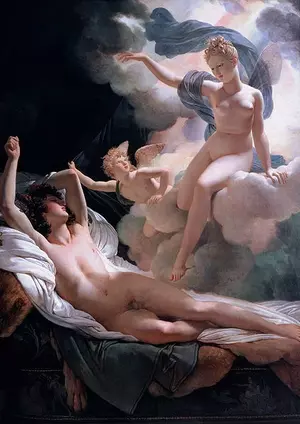

So back to Python and to what polymorphism means in the context of programming languages. **Polymorphism in Computer Science is the ability to present the same interface for differing underlying forms**. We can have in some programming languages polymorphic functions or methods, for example. Polymorphic functions or methods can be applied to arguments of different types, and they can behave differently depending on the type of the arguments to which they are applied. We can also define the same function name with a varying number of parameters.

Let's have a look at the following Python function:

In [32]:
def f(x, y):
    print("values: ", x, y)
f(42, 43)
f(42, 43.7) 
f(42.3, 43)
f(42.0, 43.9)

values:  42 43
values:  42 43.7
values:  42.3 43
values:  42.0 43.9


We can call this function with various types, as demonstrated in the example. In typed programming languages like Java or C++, we would have to overload f to implement the various type combinations.

Our example could be implemented like this in C++:
```
#include 
using namespace std;
void f(int x, int y ) {
    cout << "values: " << x << ", " << x << endl;
}
void f(int x, double y ) {
    cout << "values: " << x << ", " << x << endl;
}
void f(double x, int y ) {
    cout << "values: " << x << ", " << x << endl;
}
void f(double x, double y ) {
    cout << "values: " << x << ", " << x << endl;
}
int main()
{
    f(42, 43); 
    f(42, 43.7); 
    f(42.3,43);
    f(42.0, 43.9); 
}
```
Python is implicitly polymorphic. We can apply our previously defined function f even to lists, strings or other types which can be printed:

In [33]:
def f(x,y):
    print("values: ", x, y)

In [34]:
f([3,5,6],(3,5))

values:  [3, 5, 6] (3, 5)


In [35]:
f("A String", ("A tuple", "with Strings"))

values:  A String ('A tuple', 'with Strings')


In [36]:
f({2,3,9}, {"a":3.4,"b":7.8, "c":9.04})

values:  {9, 2, 3} {'a': 3.4, 'b': 7.8, 'c': 9.04}
